# Exploratory Data Analysis - BRISC Dataset

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
BRISC_DATA_PATH = pathlib.Path('../brisc2025')
CLASSIFICATION_PATH = BRISC_DATA_PATH / 'classification_task'
SEGMENTATION_PATH = BRISC_DATA_PATH / 'segmentation_task'

METADATA_FILE = BRISC_DATA_PATH / 'manifest.csv'

## Data Loading and Analysis

In [3]:
df = pd.read_csv(METADATA_FILE)
df.head()

,relative_path,filename,task,split,index,tumor_code,tumor_label,plane_code,plane_label,sequence,is_mask,linked_image,width,height,file_size_bytes,sha256
0,classification_task\test\glioma\brisc2025_test...,brisc2025_test_00001_gl_ax_t1.jpg,classification,test,1,gl,glioma,ax,axial,T1,False,NaN,512,512,25826,b513a83f68e486f45159b004d356782e78284014532151...
1,classification_task\test\glioma\brisc2025_test...,brisc2025_test_00002_gl_ax_t1.jpg,classification,test,2,gl,glioma,ax,axial,T1,False,NaN,512,512,20982,5b4e4a0f482cb68955c340205d475f25c3a30718bd3b48...
2,classification_task\test\glioma\brisc2025_test...,brisc2025_test_00003_gl_ax_t1.jpg,classification,test,3,gl,glioma,ax,axial,T1,False,NaN,512,512,13285,6fd1918b39e7a7f92fa5652d7802583f3251fed50a23ec...
3,classification_task\test\glioma\brisc2025_test...,brisc2025_test_00004_gl_ax_t1.jpg,classification,test,4,gl,glioma,ax,axial,T1,False,NaN,512,512,26137,216b65a45d7effb4ebce1c9893f97d12449c9da777f818...
4,classification_task\test\glioma\brisc2025_test...,brisc2025_test_00005_gl_ax_t1.jpg,classification,test,5,gl,glioma,ax,axial,T1,False,NaN,512,512,21709,c35734545021ab5a4f55fb87e08732e26fb16abe887927...


In [4]:
df[df['linked_image'].notnull()]

,relative_path,filename,task,split,index,tumor_code,tumor_label,plane_code,plane_label,sequence,is_mask,linked_image,width,height,file_size_bytes,sha256
6860,segmentation_task\test\masks\brisc2025_test_00...,brisc2025_test_00001_gl_ax_t1.png,segmentation,test,1,gl,glioma,ax,axial,T1,True,segmentation_task\test\images\brisc2025_test_0...,512,512,1346,b845c30192064e29c0ce59750a6ab0930b7839006e13c2...
6861,segmentation_task\test\masks\brisc2025_test_00...,brisc2025_test_00002_gl_ax_t1.png,segmentation,test,2,gl,glioma,ax,axial,T1,True,segmentation_task\test\images\brisc2025_test_0...,512,512,1635,b6fe3c48fcdb401199eb610681bf9c944c69f64eeb314e...
6862,segmentation_task\test\masks\brisc2025_test_00...,brisc2025_test_00003_gl_ax_t1.png,segmentation,test,3,gl,glioma,ax,axial,T1,True,segmentation_task\test\images\brisc2025_test_0...,512,512,3605,07f1358d2a7441e2e7b8775732cc3e0c7b17feedfcb0a1...
6863,segmentation_task\test\masks\brisc2025_test_00...,brisc2025_test_00004_gl_ax_t1.png,segmentation,test,4,gl,glioma,ax,axial,T1,True,segmentation_task\test\images\brisc2025_test_0...,512,512,2869,ceb0589b4232e75533d90d731b8c1847612fc8db14cfea...
6864,segmentation_task\test\masks\brisc2025_test_00...,brisc2025_test_00005_gl_ax_t1.png,segmentation,test,5,gl,glioma,ax,axial,T1,True,segmentation_task\test\images\brisc2025_test_0...,512,512,1513,31583073f4767b475abb2918e24a3182396c8df7030f5b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,segmentation_task\train\masks\brisc2025_train_...,brisc2025_train_04996_pi_sa_t1.png,segmentation,train,4996,pi,pituitary,sa,sagittal,T1,True,segmentation_task\train\images\brisc2025_train...,512,512,1905,2a21b781138c8c9503e61e217cdf685b1edbbc6d83a72f...
15582,segmentation_task\train\masks\brisc2025_train_...,brisc2025_train_04997_pi_sa_t1.png,segmentation,train,4997,pi,pituitary,sa,sagittal,T1,True,segmentation_task\train\images\brisc2025_train...,512,512,1848,802a80490a7c65306f2b9e377f6d0be89e3258091d9470...
15583,segmentation_task\train\masks\brisc2025_train_...,brisc2025_train_04998_pi_sa_t1.png,segmentation,train,4998,pi,pituitary,sa,sagittal,T1,True,segmentation_task\train\images\brisc2025_train...,512,512,1806,a00aba05c57e753e0605828b1d2b4eb7ef53f5ecb8c777...
15584,segmentation_task\train\masks\brisc2025_train_...,brisc2025_train_04999_pi_sa_t1.png,segmentation,train,4999,pi,pituitary,sa,sagittal,T1,True,segmentation_task\train\images\brisc2025_train...,512,512,1891,223dc687ebb83bef9b4f0af481658256edd1a51026e478...


In [5]:
df.task.unique()

array(['classification', 'segmentation'], dtype=object)

In [6]:
# Split data based on tasks
classification_df = df.loc[(df['task'] == 'classification')]
segmentation_df = df.loc[(df['task'] == 'segmentation')]

## Classification

In [7]:
def plot_bars_with_annotations(data: pd.DataFrame, title, xlabel, ylabel, **kwargs):
    hue = kwargs.get('x') # Get the attribute 'x' to use as the hue

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.countplot(train_df, ax=ax, hue=hue, **kwargs)
    total = train_df.shape[0]
    
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height()) / total * 100:.2f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            color='black',
            fontsize=10,
        )

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.show()

def plot_pie_with_annotations():
    pass

In [8]:
colors = sns.color_palette('viridis')

### Amount of Samples per Subset (Train, Test)

In [9]:
train_df = classification_df.loc[(df['split'] == 'train')]
train_df.head()

,relative_path,filename,task,split,index,tumor_code,tumor_label,plane_code,plane_label,sequence,is_mask,linked_image,width,height,file_size_bytes,sha256
1000,classification_task\train\glioma\brisc2025_tra...,brisc2025_train_00001_gl_ax_t1.jpg,classification,train,1,gl,glioma,ax,axial,T1,False,NaN,512,512,25556,e803a3e10f73f993deb46672b973ef17c17b9535964bc0...
1001,classification_task\train\glioma\brisc2025_tra...,brisc2025_train_00002_gl_ax_t1.jpg,classification,train,2,gl,glioma,ax,axial,T1,False,NaN,512,512,18988,45f2241b30fd00f31ac348b51c494a3eb371a288cc3e61...
1002,classification_task\train\glioma\brisc2025_tra...,brisc2025_train_00003_gl_ax_t1.jpg,classification,train,3,gl,glioma,ax,axial,T1,False,NaN,512,512,20332,3033d7eefcf473a85c5e9392790cdfe047cc3538726156...
1003,classification_task\train\glioma\brisc2025_tra...,brisc2025_train_00004_gl_ax_t1.jpg,classification,train,4,gl,glioma,ax,axial,T1,False,NaN,512,512,16032,bd05dccad67cc85ab25fdef6ff9dd6a8af521d8bb89a0a...
1004,classification_task\train\glioma\brisc2025_tra...,brisc2025_train_00005_gl_ax_t1.jpg,classification,train,5,gl,glioma,ax,axial,T1,False,NaN,512,512,21645,b28ebe80454818c55fc8568b7e4e0e66800e7c84f05646...


In [10]:
classification_df['split'].value_counts()

split
train    5000
test     1000
Name: count, dtype: int64

### Target Distribution

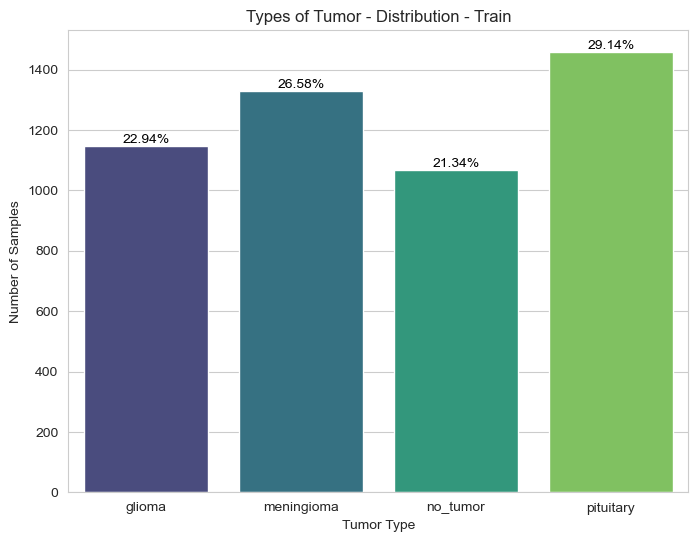

In [11]:
plot_bars_with_annotations(
    train_df,
    'Types of Tumor - Distribution - Train',
    'Tumor Type',
    'Number of Samples',
    x='tumor_label', 
    palette='viridis'
)

### Plane Distribution

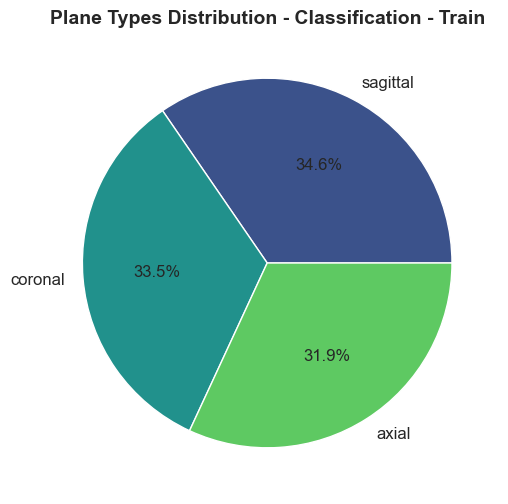

In [12]:
plane_counts = train_df['plane_label'].value_counts()
colors = sns.color_palette('viridis', len(plane_counts))

fig, ax = plt.subplots(figsize=(10, 6))

ax.pie(
    plane_counts,
    labels=plane_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    textprops={'fontsize': 12}
)

ax.set_title("Plane Types Distribution - Classification - Train", fontsize=14, fontweight='bold')

plt.show()

### Images Visualization

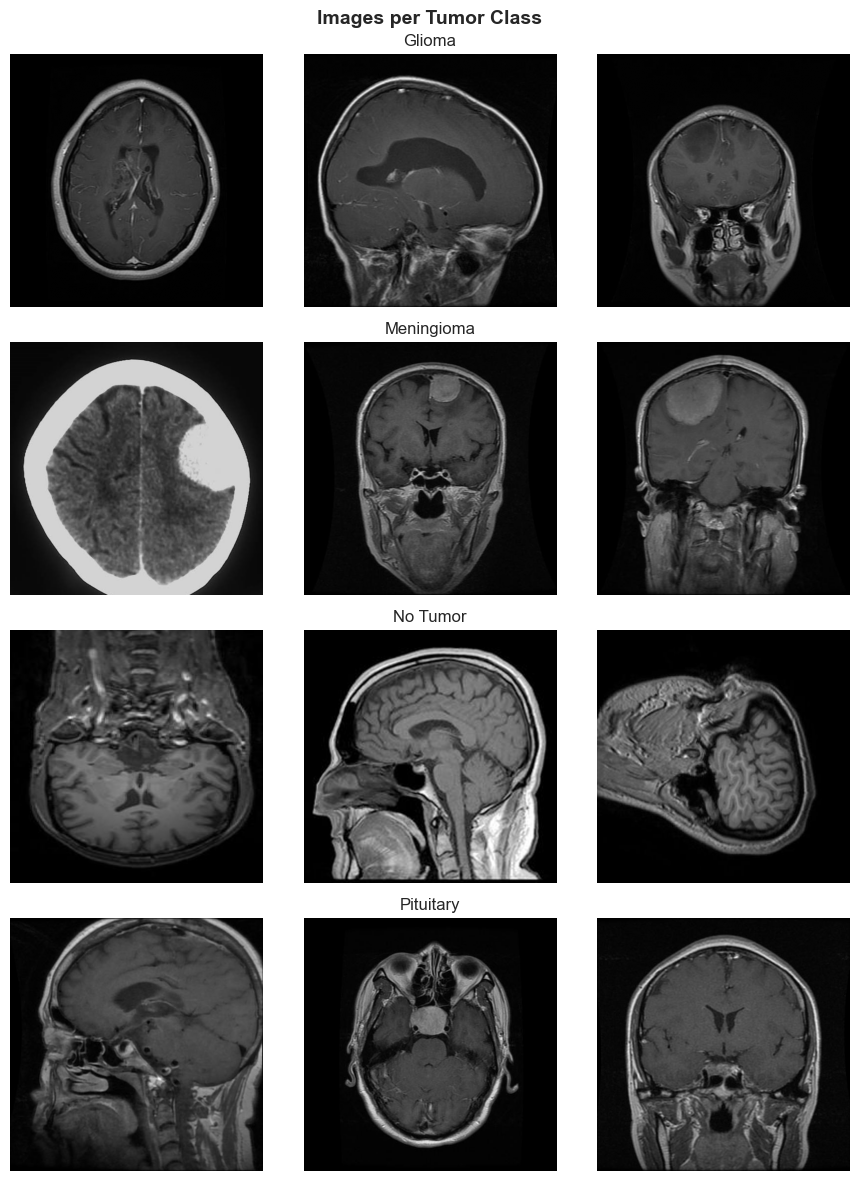

In [68]:
images_per_row = 3
tumor_types = classification_df['tumor_label'].unique()
n_classes = len(tumor_types)

fig, axes = plt.subplots(n_classes, images_per_row, figsize=(9, n_classes * 3))

for row_idx, tumor_type in enumerate(tumor_types):
    filter_ = classification_df['tumor_label'] == tumor_type
    samples_paths = classification_df[filter_].sample(images_per_row)['relative_path']
    samples_paths = samples_paths.str.replace('\\', '/')

    
    for col_idx, img_path in enumerate(samples_paths):
        img = Image.open(BRISC_DATA_PATH / img_path).resize((512, 512))
        ax = axes[row_idx][col_idx]
        ax.imshow(img, cmap='gray')
        ax.set_axis_off()

        if col_idx == images_per_row // 2:
            title = tumor_type.replace('_', ' ').title()
            ax.set_title(title, fontsize=12)

plt.suptitle('Images per Tumor Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Segmentation

### Amount of Samples per Subset (Train, Test)

In [14]:
segmentation_df['split'].value_counts() // 2

split
train    3933
test      860
Name: count, dtype: int64

### Visualize Images and Masks

In [15]:
masks_df = segmentation_df[segmentation_df['linked_image'].notnull()]

In [16]:
masks_df.loc[:, 'relative_path'] = masks_df['relative_path'].str.replace('\\', '/')
masks_df.loc[:, 'linked_image'] = masks_df['linked_image'].str.replace('\\', '/')

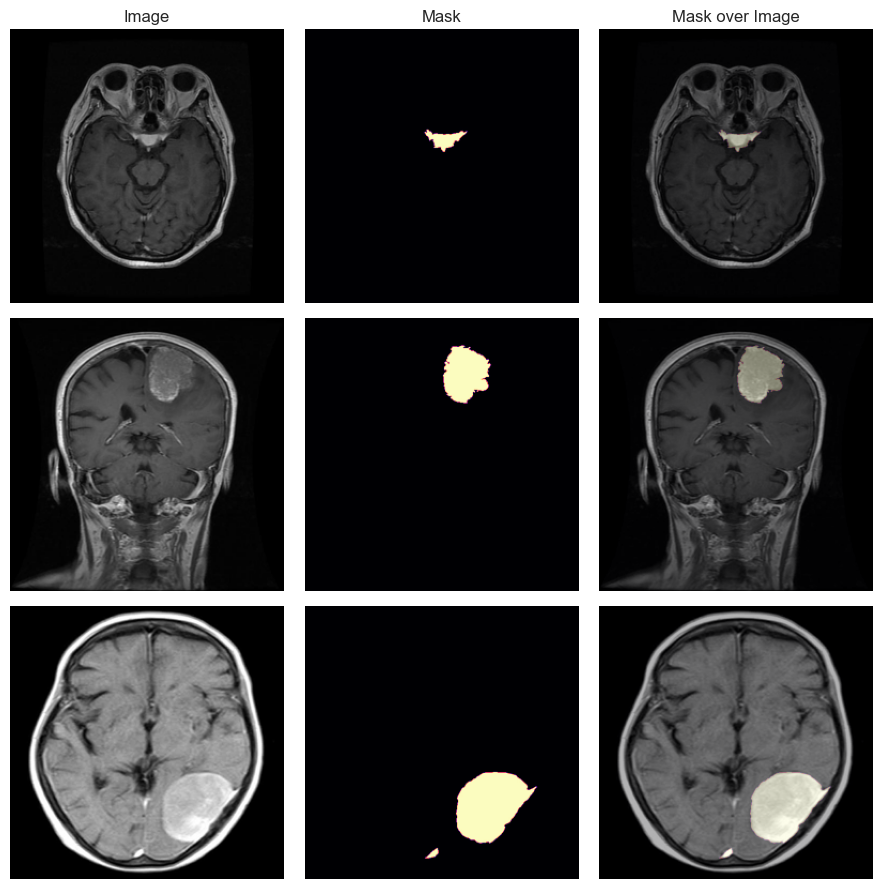

In [52]:
n_images = 3

fig, axes = plt.subplots(n_images, n_images, figsize=(9, 9))

for row_idx in range(n_images):
    sample = masks_df.sample()
    mask_path, image_path = sample['relative_path'].item(), sample['linked_image'].item()

    img = Image.open(BRISC_DATA_PATH / image_path).resize((256, 256))
    mask = Image.open(BRISC_DATA_PATH / mask_path).resize((256, 256))
    
    ax1 = axes[row_idx][0]
    ax2 = axes[row_idx][1]
    ax3 = axes[row_idx][2]
    
    ax1.imshow(img, cmap='gray')
    ax1.set_axis_off()

    ax2.imshow(mask, cmap='magma')
    ax2.set_axis_off()

    ax3.imshow(img, cmap='gray')
    ax3.imshow(mask, cmap='magma', alpha=0.3)
    ax3.set_axis_off()

    if row_idx == 0:
        ax1.set_title('Image')
        ax2.set_title('Mask')
        ax3.set_title('Mask over Image')

plt.tight_layout()
plt.show()

### Plane Distribution

In [120]:
train_df = segmentation_df.loc[(df['split'] == 'train')]

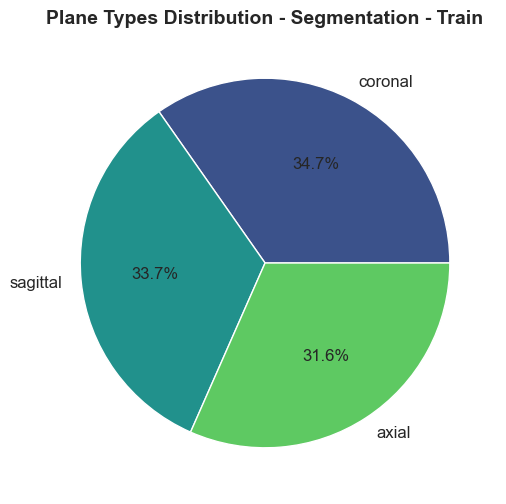

In [122]:
plane_counts = train_df['plane_label'].value_counts()
colors = sns.color_palette('viridis', len(plane_counts))

fig, ax = plt.subplots(figsize=(10, 6))

ax.pie(
    plane_counts,
    labels=plane_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    textprops={'fontsize': 12}
)

ax.set_title("Plane Types Distribution - Segmentation - Train", fontsize=14, fontweight='bold')

plt.show()